In [107]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day30-function-transformer/train.csv', usecols =['Age', 'Fare', 'Survived'])

In [109]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [110]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [111]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [112]:
X = df.iloc[: , 1:3]
Y = df.iloc[: , 0]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


D:\Temp\ipykernel_14400\1021261212.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


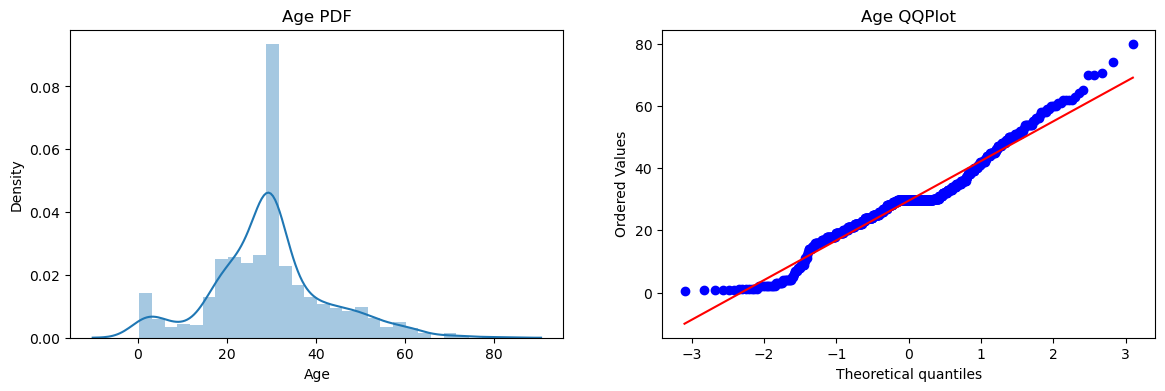

In [115]:
plt.figure(figsize=(14,4))
plt.subplot(121)

sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQPlot')

plt.show()

D:\Temp\ipykernel_14400\4016755566.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQPlot')

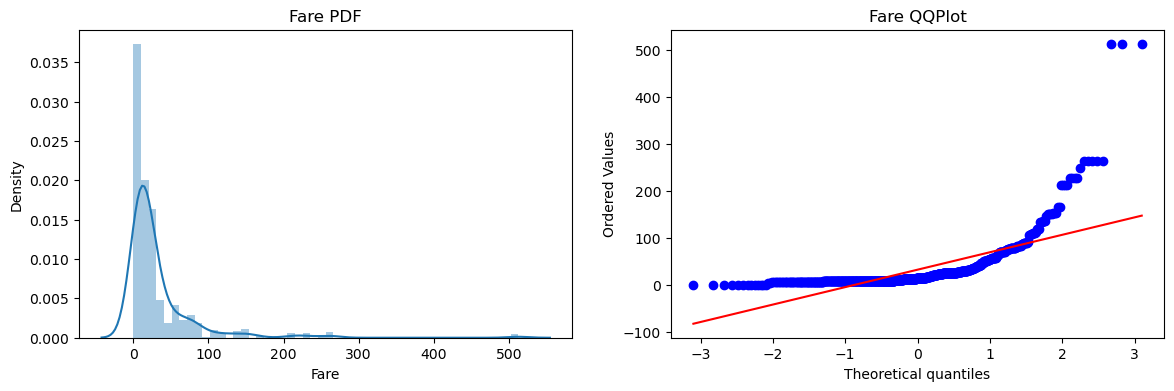

In [116]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQPlot')           ## Here fare column is ight is right skew

In [117]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [118]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy LR : ', accuracy_score(y_test,y_pred))
print('Accuracy DT : ', accuracy_score(y_test,y_pred1))

Accuracy LR :  0.6480446927374302
Accuracy DT :  0.659217877094972


In [119]:
trf = FunctionTransformer(func=np.log1p)

In [120]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

In [121]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transform, y_train)
clf2.fit(X_train_transform, y_train)

y_pred = clf.predict(X_test_transform)
y_pred1 = clf2.predict(X_test_transform)

print('Accuracy LR : ', accuracy_score(y_test, y_pred))
print('Accuracy DT : ', accuracy_score(y_test, y_pred1))

Accuracy LR :  0.6815642458100558
Accuracy DT :  0.6815642458100558


In [122]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf, X_transformed,Y,scoring='accuracy' ,cv=10)))
print('DT',np.mean(cross_val_score(clf2, X_transformed,Y, scoring='accuracy', cv= 10)))

LR 0.678027465667915
DT 0.6566167290886392


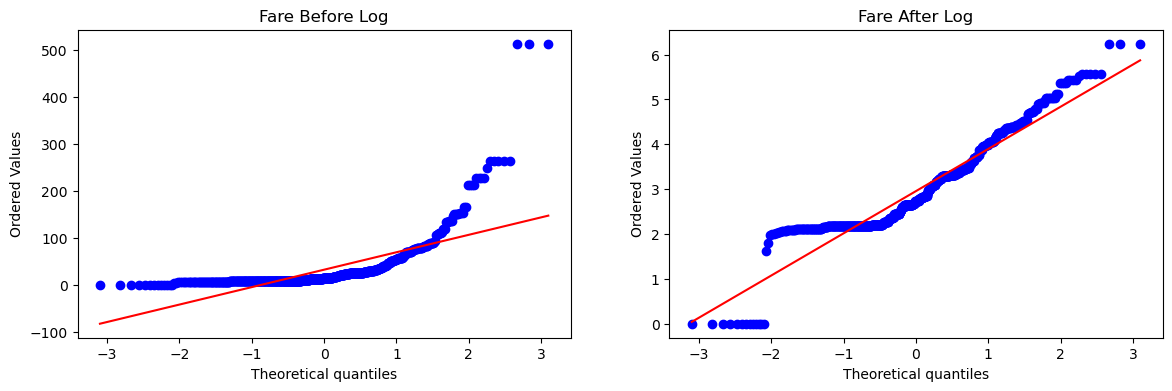

In [123]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Fare'], dist='norm',plot=plt)
plt.title('Fare After Log')

plt.show()

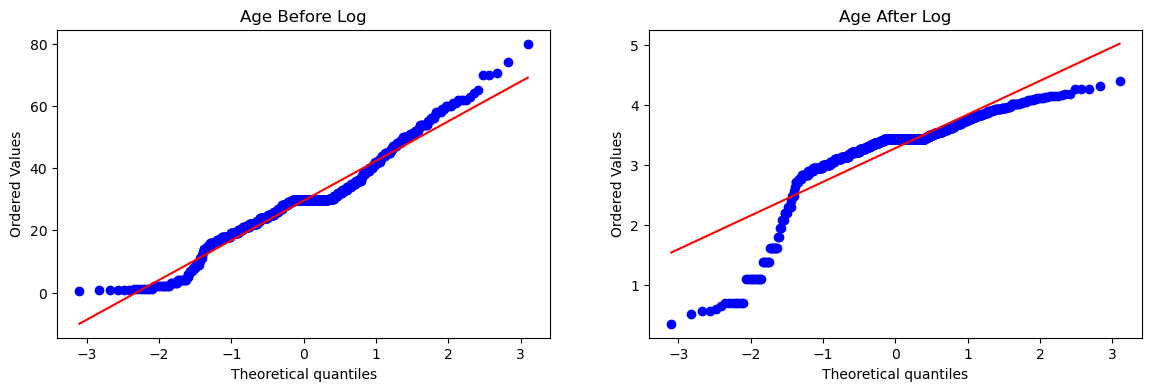

In [124]:
plt.figure(figsize= (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Age'],dist='norm',plot=plt)
plt.title('Age After Log')

plt.show()

## Now we apply transform only Fare column

In [126]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transform2 = trf2.fit_transform(X_train)
X_test_transform2 = trf2.transform(X_test)

In [148]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transform2, y_train)
clf2.fit(X_train_transform2, y_train)

y_pred = clf.predict(X_test_transform2)
y_pred2 = clf2.predict(X_test_transform2)

print('Accuracy LR : ', accuracy_score(y_test, y_pred))
print('Accuracy DT : ', accuracy_score(y_test, y_pred2))

Accuracy LR :  0.6703910614525139
Accuracy DT :  0.659217877094972


In [170]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf, X_transformed, Y, scoring='accuracy', cv=10)))
print('DT',np.mean(cross_val_score(clf2, X_transformed, Y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6588888888888889


In [182]:
def apply_transform(transform):
    x = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([('log' , FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()

    print('Accuracy', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6712609238451936


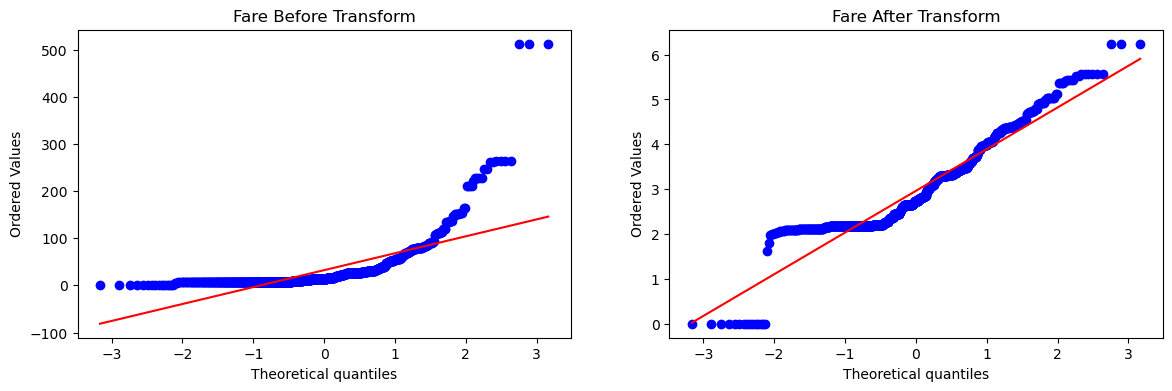

In [198]:
apply_transform(np.log1p)

Accuracy 0.6431335830212235


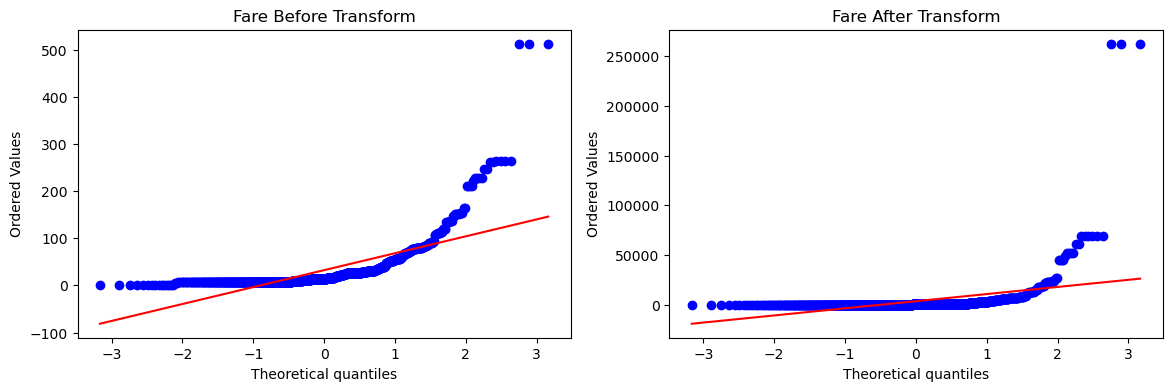

In [200]:
apply_transform(lambda x : x**2)

Accuracy 0.6611485642946316


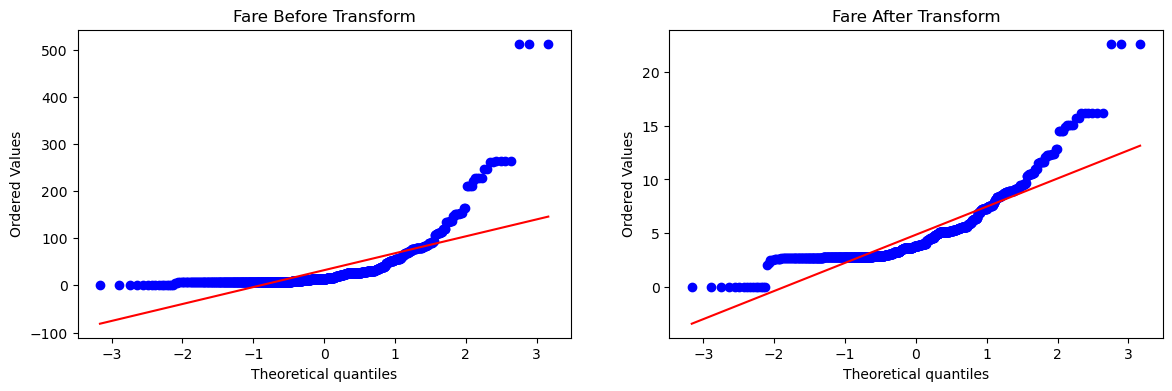

In [202]:
apply_transform(lambda x: x**(1/2))

Accuracy 0.61729088639201


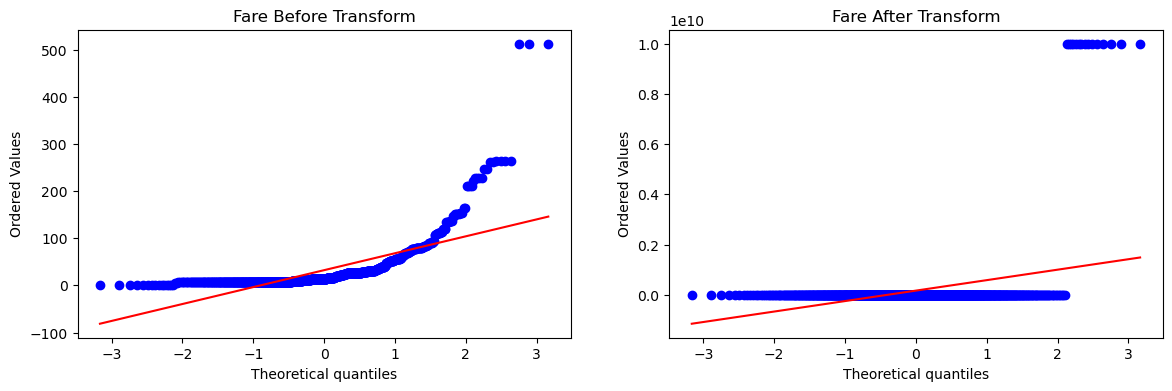

In [208]:
apply_transform(lambda x : 1/(x+0.0000000001))